# Introduction

Hi Jacopo and Pietro! Here's my project idea (it's basically a full project already done imo). I was able to run the DenseASPP algorithm for image segmentation. Here's how it works:

First we import all libraries as usual:

In [1]:
# import class for prediction with  DenseASPP
from inference import Inference

# import libraries
from os.path import join
from os import listdir, remove
import matplotlib.pyplot as plt
from IPython.display import HTML

# import my functions
from functions import remove_directory, create_directories, video_to_images, images_to_video, avi_to_mp4, stack_videos

# define predict function
def predict(model_name = 'DenseASPP161', model_path = './weights/denseASPP161.pkl', img_dir = './Cityscapes/val', use_multiprocessing = False):
    infer = Inference(model_name, model_path, use_multiprocessing)
    infer.folder_inference(img_dir, is_multiscale=False)

In [2]:
# This is needed just to make the multiprocessing work
from torch.multiprocessing import set_start_method
set_start_method('spawn')

## The cityscapes dataset

Here we test the model on 8 images from the **Cityscapes** dataset. The model was already pretrained on this dataset so we are expecting a good performance.

We start by displaying the images:


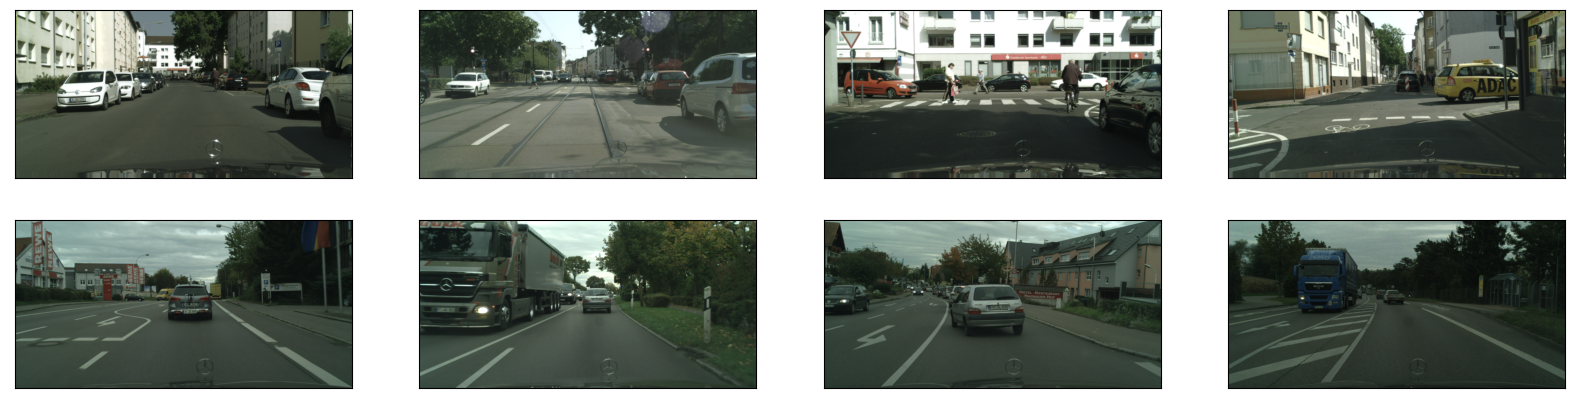

In [3]:
# set the image directory
img_dir = './Cityscapes'

# plot images
fig, axs = plt.subplots(2,4, figsize = (20,5))
images = [join(img_dir, img_subdir, img_name) for img_subdir in listdir(img_dir) for img_name in listdir(join(img_dir, img_subdir))]
for i in range(2):
    for j in range(4):
        img = plt.imread(images[i*4+j])
        axs[i,j].imshow(img)
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])

Here we run the prediction on the images. The progress bars represent the images in the different folders being predicted.

In [4]:
# remove prediction directory (if already exists)
remove_directory(img_dir + '_pred', ask = True)

# create prediction directory and sub-directories
for folder in listdir(img_dir):
    create_directories(img_dir + '_pred/' + folder)

# predict images
predict(model_name = 'DenseASPP161',
    model_path = './weights/denseASPP161.pkl',
    img_dir = img_dir,
    use_multiprocessing = False)


The folder "./Cityscapes_pred" was removed!

created folder ./Cityscapes_pred/frankfurt
created folder ./Cityscapes_pred/lindau
loading pre-trained weight


100%|██████████| 4/4 [00:03<00:00,  1.17it/s]


Finally, we show the images and the predicted masks side by side. As we can see, results are exceptional!

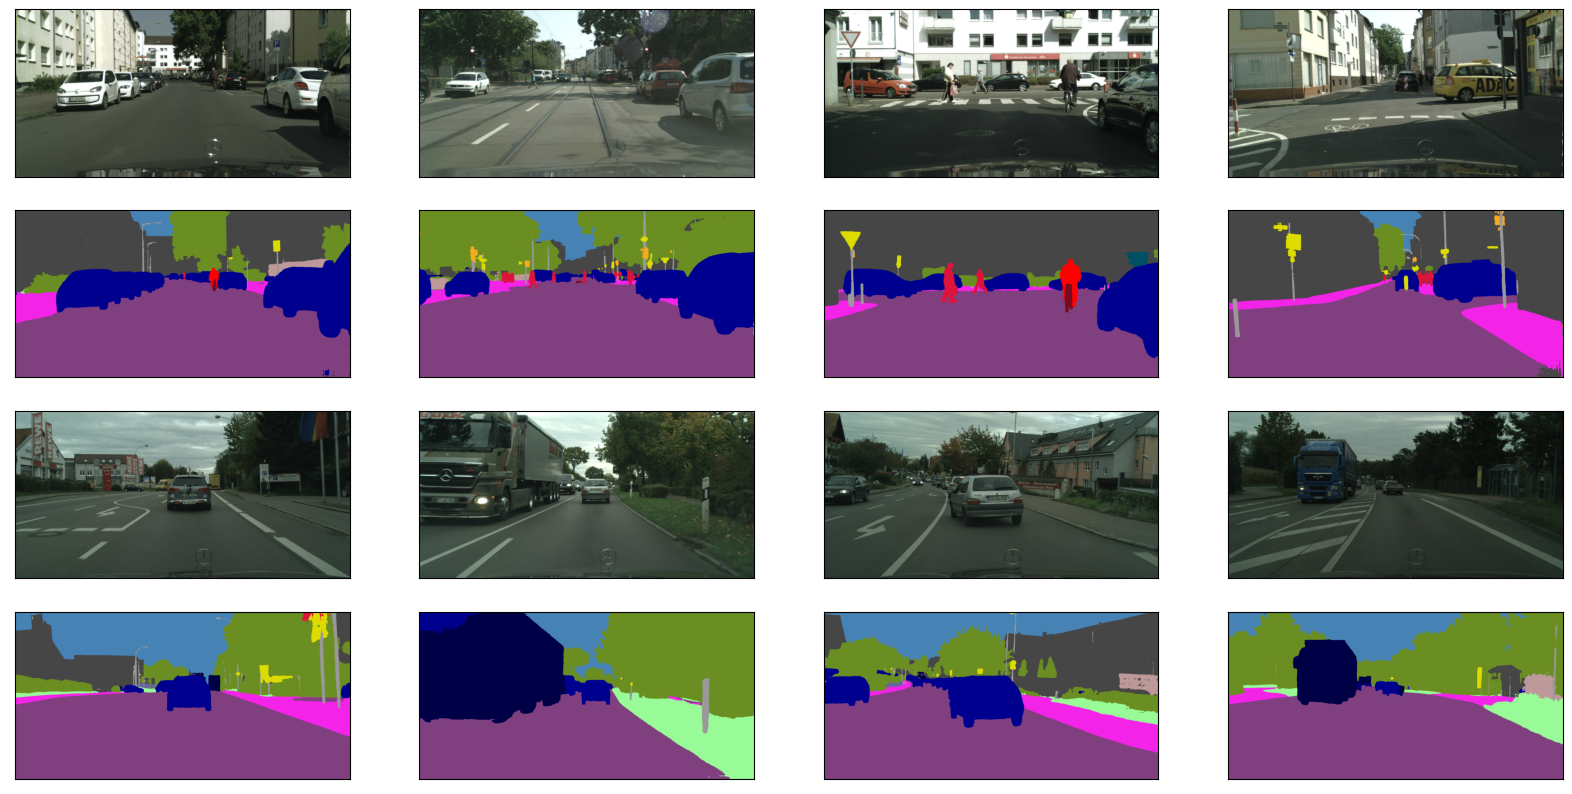

In [5]:
# set the masks directory
masks_dir = './Cityscapes_pred'

# plot masks
fig, axs = plt.subplots(4,4, figsize = (20,10))
masks = [join(masks_dir, masks_subdir, mask_name) for masks_subdir in listdir(masks_dir) for mask_name in listdir(join(masks_dir, masks_subdir))]

images_masks = images[:4] + masks[:4] + images[4:] + masks[4:]

for i in range(4):
    for j in range(4):
        img = plt.imread(images_masks[i*4+j])
        axs[i,j].imshow(img)
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])

# Youtube video: walk in London

Professor gave us a link to a YouTube video so my assumption is that he wanted us to run the prediction on this video. Here's the video in question:

In [6]:
w, h = 1280, 720
scale = 0.3

HTML(f"""
    <video alt="test" width={w*scale} height={h*scale} controls>
        <source src="video.mp4" type="video/mp4">
    </video>
""")

So first we convert all video frames in png images (here we only do the first 300 frames, otherwise the prediction would take hours):

In [7]:
# covert video in png images

destination_folder = 'Frames_png/frames/'

create_directories(destination_folder)
video_to_images('video.mp4', destination_folder, start_frame = 0, end_frame=300, verbose = False)

Then we predict all of the png files:

In [8]:
# set image directory
img_dir = 'Frames_png'

# remove prediction directory (if already exists)
remove_directory(img_dir + '_pred', ask = True)

# create prediction directory and sub-directories
for folder in listdir(img_dir):
    create_directories(img_dir + '_pred/' + folder)

# predict images
predict(model_name = 'DenseASPP161',
    model_path = './weights/denseASPP161.pkl',
    img_dir = img_dir,
    use_multiprocessing = False)


The folder "Frames_png_pred" was removed!

created folder Frames_png_pred/frames
loading pre-trained weight


100%|██████████| 301/301 [03:21<00:00,  1.49it/s]


We then assemble the masks in an uncompressed video file (.avi):

In [9]:
images_to_video('./Frames_png_pred/frames/', 'masks.avi', fps = 30.0)

100%|██████████| 301/301 [00:08<00:00, 36.66it/s]


Since the uncompressed video weights gigabytes, we convert it in compressed format (.mp4) and remove the .avi file:

In [10]:
avi_to_mp4("masks.avi","masks.mp4")
remove("masks.avi")

Moviepy - Building video masks.mp4.
Moviepy - Writing video masks.mp4



Moviepy - Done !
Moviepy - video ready masks.mp4


Finally, if we do the process for all frames in the video, we're left with the following video:

In [11]:
w, h = 2048, 1024
scale = 0.3

HTML(f"""
    <video alt="test" width={w*scale} height={h*scale} controls>
        <source src="masks_full.mp4" type="video/mp4">
    </video>
""")

Results are not as clean as the ones on the Cityscapes dataset obviously, mainly because of new noisy factors (works in the streets, signs, and other new elements that were not in the original dataset) and discussing them would be a great part of the project!

For better visualization, we can make a single video which combines both:

In [12]:
# stack_videos("video.mp4","masks_full.mp4","my_stack.mp4")

But this takes hours and I still didn't do the computations for it so for the moment I commented it out.

As a bonus I have the results from another algorithm called U-net, which is the one I'm working with currently. It actually fails terribly since it identifies as cars the people (or maybe the colormap is just messed up I'm not too sure honestly), but we can still flex that we tried to train our own model directly on the Cityscapes dataset! (Instead of taking a pretrained one)

For some reason importing this video in this .ipynb crashes it but whatever you can find it in "video_unet.mp4"